In [1]:
import json
import random

import numpy as np
import pandas as pd

---

## Config

---

In [2]:
CONFIG = {}
CONFIG["N_DAYS"] = 20
CONFIG["GROUPS"] = [
    "AgileVigo",
    "AIndustriosa",
    "CodeSign",
    "GALPon",
    "GalsTech",
    "GDGVigo",
    "JoomlaVigo",
    "JavascriptVigo",
    "PHPVigo",
    "PythonVigo",
    "SeoGalicia",
    "SysAdminGalicia",
    "UxGalicia",
    "VigoBrain",
    "VigoJug",
    "VigoLabs",
    "Vigo++",
    "VigoDevOps",
    "Python2Vigo",
    "AnsibleVigo",
    "MatlabVigo",
    "RVigo",
    "ViGo",
    "VigoÑapas",
    "FortranVigo",
    "EnsambladorVigo",
    "HaskellVigo"
]
CONFIG["N_GROUPS"] = len(CONFIG["GROUPS"])
CONFIG["N_MEMBERS_PER_GROUP"] = 30
CONFIG["ABEL_CABALLERO_BIRTHDAY"] = random.choice(range(CONFIG["N_DAYS"]))
CONFIG["CELTA_CHAMPIONS_DAY"] = random.choice(range(CONFIG["N_DAYS"]))

In [3]:
with open("config.json", "w") as f:
    json.dump(CONFIG, f)

---

## Data

---

In [4]:
n_total_members = CONFIG["N_GROUPS"] * CONFIG["N_MEMBERS_PER_GROUP"]

In [5]:
members = pd.DataFrame()

In [6]:
members["group"] = np.random.choice(CONFIG["GROUPS"], size=n_total_members)
members["favourite_day"] = np.random.randint(0, CONFIG["N_DAYS"], size=n_total_members)
members["hates_celta"] = (members["favourite_day"] == CONFIG["CELTA_CHAMPIONS_DAY"]).astype(int)
members["hates_pharaon"] = (members["favourite_day"] == CONFIG["ABEL_CABALLERO_BIRTHDAY"]).astype(int)

In [7]:
members.to_csv("members.csv", index=False)

In [8]:
members["group"].value_counts()

VigoDevOps         47
VigoBrain          41
PHPVigo            38
GDGVigo            38
AIndustriosa       38
JoomlaVigo         35
HaskellVigo        34
Python2Vigo        34
JavascriptVigo     34
EnsambladorVigo    31
VigoÑapas          31
PythonVigo         30
SeoGalicia         29
MatlabVigo         29
GALPon             29
CodeSign           28
FortranVigo        27
SysAdminGalicia    27
UxGalicia          26
VigoJug            25
AgileVigo          25
GalsTech           24
VigoLabs           23
RVigo              23
AnsibleVigo        23
Vigo++             21
ViGo               20
Name: group, dtype: int64

---

## Random valid solution

---

In [9]:
calendar = np.random.choice(CONFIG["GROUPS"], size=CONFIG["N_DAYS"], replace=False)
calendar = pd.DataFrame(calendar)

In [10]:
calendar.to_csv("calendar.csv", index=False, header=False)

In [11]:
calendar

,0
0,AIndustriosa
1,Vigo++
2,Python2Vigo
3,VigoLabs
4,RVigo
5,GDGVigo
6,PHPVigo
7,PythonVigo
8,SysAdminGalicia
9,VigoÑapas


---

## Fitness

---

In [12]:
def fitness(config, members, calendar):

    with open(config) as f:
        CONFIG = json.load(f)
    
    members = pd.read_csv(members)

    calendar = pd.read_csv(calendar, header=None)[0].values

    scores = np.zeros(CONFIG["N_DAYS"])

    scores[CONFIG["CELTA_CHAMPIONS_DAY"]] -= 4
    scores[CONFIG["ABEL_CABALLERO_BIRTHDAY"]] -= 8

    for x in members.groupby("group", sort=False):
        group = x[0]
        n_members = len(x[1])
        favorite_day_counts = x[1]["favourite_day"].value_counts()

        if group in calendar:
            proposed_day = np.where(calendar == group)[0][0]

            if proposed_day in favorite_day_counts:
                scores[proposed_day] += favorite_day_counts[proposed_day] * 2

            scores[proposed_day] += n_members

        else:
            if group == "VigoBrain":
                scores -= 2
            for day, n in favorite_day_counts.items():
                if group == "VigoBrain":
                    scores[day] -= n * 5
                else:
                    scores[day] -= n * 2

    return scores

In [13]:
scores = fitness("config.json", "members.csv", "calendar.csv")

In [14]:
scores

array([ 22.,  -3.,  30.,  15.,  15.,  30.,  22.,   6.,  -3.,  13.,  15.,
        18.,  14.,  19.,   7.,  15.,   6.,  29.,  33.,   7.])

In [15]:
from matplotlib import pyplot as plt

In [16]:
%matplotlib inline

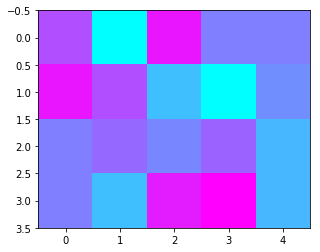

In [18]:
plt.imshow(scores.reshape(4, 5), cmap="cool");

In [20]:
def plot_group_heatmap(group):
    heatmap = np.zeros(CONFIG["N_DAYS"])
    counts = members.loc[members["group"] == group, "favourite_day"].value_counts()
    for index, value in counts.items():
        heatmap[index] = value
    
    plt.imshow(heatmap.reshape(4, 5), cmap="cool")

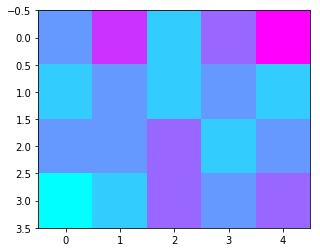

In [21]:
plot_group_heatmap("VigoBrain")